In [2]:
!pwd

/home/william/code/ar10000/mountain_goat/notebooks


In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mountain_goat.get_body_coordinates import get_pose_image

# cutting video into frames

In [4]:
filename ="cropped.mp4"
frame_list =[]
vidCap = cv2.VideoCapture(filename)
video_length = int(vidCap.get(cv2.CAP_PROP_FRAME_COUNT)) 
while vidCap.isOpened():
    success, frame = vidCap.read()
    if not success:
        break
    frame_list.append(frame)


# exploring frames

In [5]:
len(frame_list)
video_length

469

In [6]:
frame_list[100].shape

(1080, 608, 3)

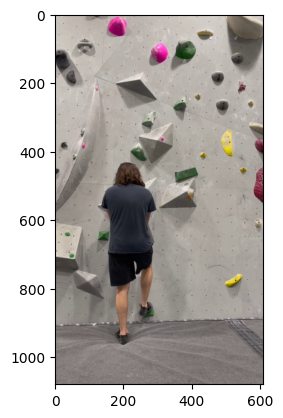

In [7]:
plt.imshow(frame_list[13][:, :, ::-1]);

In [8]:
def resize_image(image,scale):
    """resize image with a scale"""
    scale_percent = scale# percent of original size
    img= image
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized_image

In [9]:
resized_frame_list =[]
scale = 40
for image in frame_list:
    resized_image = resize_image(image, scale)
    resized_frame_list.append(resized_image)

(432, 243, 3)

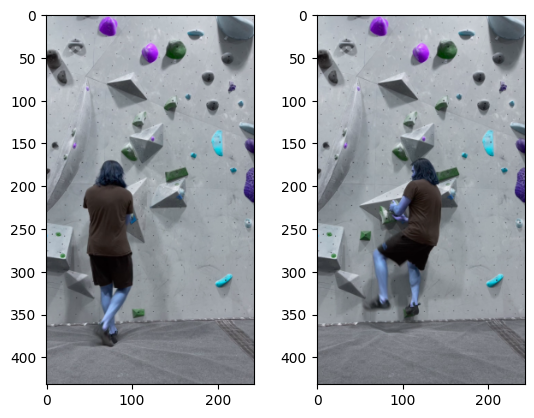

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(resized_frame_list[0])
ax[1].imshow(resized_frame_list[80])
resized_frame_list[0].shape

## flattening frames 

In [11]:
flattened_frames = []
for frame in resized_frame_list:
    im =frame.flatten()
    flattened_frames.append(im)
    

In [12]:
flattened_array = np.vstack(flattened_frames)

In [13]:
flattened_array.shape

(459, 314928)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial , signal

In [15]:
similarity_vector = cosine_similarity(flattened_array)

In [18]:
# plt.figure(figsize=(16, 16))
# sns.heatmap(similarity_vector, linewidths=.5)
len(disimilar_frames)

0

In [30]:
disimilar_frames= []
length_video = len(resized_frame_list)
similarity_dict={}
for id, frame in enumerate(resized_frame_list):
    if id == length_video-1:
        break
    if id ==0 and len(disimilar_frames) == 0: # if disimilar frames is empty add the first frame in the video
        disimilar_frames.append(frame)
    new_frame = frame # new  frame
    
    recent_signf_frame = disimilar_frames[-1]#most recent significant frame
    # get_pose_image returns dict of coordinates , so here we change teh values(the coordinates)into an array for the first and 
    #next frame
    new_frame_coordinates=np.array(list(get_pose_image(new_frame).values()))
    signf_frame_coordinates = np.array(list(get_pose_image(recent_signf_frame).values()))
    #calculating similarity
    similarity = -1 * (spatial.distance.cosine(new_frame_coordinates, signf_frame_coordinates) - 1)
    print(f'Calculating similarity , now on frame{id}')

#     print(similarity)
    if similarity < 0.9998:
        disimilar_frames.append(new_frame)
    

Calculating similarity , now on frame0
Calculating similarity , now on frame1
Calculating similarity , now on frame2
Calculating similarity , now on frame3
Calculating similarity , now on frame4
Calculating similarity , now on frame5
Calculating similarity , now on frame6
Calculating similarity , now on frame7
Calculating similarity , now on frame8
Calculating similarity , now on frame9
Calculating similarity , now on frame10
Calculating similarity , now on frame11
Calculating similarity , now on frame12
Calculating similarity , now on frame13
Calculating similarity , now on frame14
Calculating similarity , now on frame15
Calculating similarity , now on frame16
Calculating similarity , now on frame17
Calculating similarity , now on frame18
Calculating similarity , now on frame19
Calculating similarity , now on frame20
Calculating similarity , now on frame21
Calculating similarity , now on frame22
Calculating similarity , now on frame23
Calculating similarity , now on frame24
Calculatin

Calculating similarity , now on frame203
Calculating similarity , now on frame204
Calculating similarity , now on frame205
Calculating similarity , now on frame206
Calculating similarity , now on frame207
Calculating similarity , now on frame208
Calculating similarity , now on frame209
Calculating similarity , now on frame210
Calculating similarity , now on frame211
Calculating similarity , now on frame212
Calculating similarity , now on frame213
Calculating similarity , now on frame214
Calculating similarity , now on frame215
Calculating similarity , now on frame216
Calculating similarity , now on frame217
Calculating similarity , now on frame218
Calculating similarity , now on frame219
Calculating similarity , now on frame220
Calculating similarity , now on frame221
Calculating similarity , now on frame222
Calculating similarity , now on frame223
Calculating similarity , now on frame224
Calculating similarity , now on frame225
Calculating similarity , now on frame226
Calculating simi

Calculating similarity , now on frame403
Calculating similarity , now on frame404
Calculating similarity , now on frame405
Calculating similarity , now on frame406
Calculating similarity , now on frame407
Calculating similarity , now on frame408
Calculating similarity , now on frame409
Calculating similarity , now on frame410
Calculating similarity , now on frame411
Calculating similarity , now on frame412
Calculating similarity , now on frame413
Calculating similarity , now on frame414
Calculating similarity , now on frame415
Calculating similarity , now on frame416
Calculating similarity , now on frame417
Calculating similarity , now on frame418
Calculating similarity , now on frame419
Calculating similarity , now on frame420
Calculating similarity , now on frame421
Calculating similarity , now on frame422
Calculating similarity , now on frame423
Calculating similarity , now on frame424
Calculating similarity , now on frame425
Calculating similarity , now on frame426
Calculating simi

In [31]:
len(disimilar_frames)

170

In [23]:
similarity_dict

{}

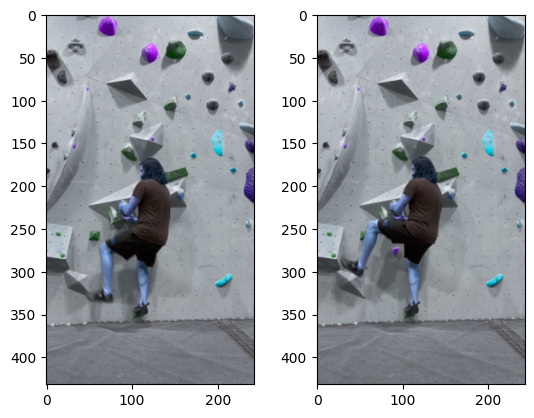

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(disimilar_frames[22])
ax[1].imshow(disimilar_frames[25])
# def show_images(list_images):
#     """show the images"""
#     nrows = int(len(list_images)/2) +1
#     ncols = int(len(list_images)/2) +1
#     fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))
#     for row in range(nrows):
#         for col in range(ncols):
#             for image in list_images:
#                 ax[row, col].imshow(image)

# show_images(disimilar_frames)

#### trying angular velocity 

In [48]:
significant_frames =[]
length_video = len(resized_frame_list)
similarity_dict={}
for id, frame in enumerate(resized_frame_list):
    if id == length_video-1:
        break
    new_frame = frame
    next_frame = resized_frame_list[id +1]
    new_frame_coordinates=np.array(list(get_pose_image(new_frame).values()))
    next_frame_coordinates = np.array(list(get_pose_image(next_frame).values()))
    #calculating angle between coordinates in frames
    unit_vector_1 = new_frame_coordinates/ np. linalg. norm(new_frame_coordinates)
    unit_vector_2 = next_frame_coordinates / np. linalg. norm(next_frame_coordinates)
    dot_product = np. dot(unit_vector_1, unit_vector_2)
    angle = np. arccos(dot_product)
    print(f'Calculating angle , now on frame{id}')
    similarity_dict[f'frame{id} vs frame{id +1}'] = angle
    
        

Calculating angle , now on frame0
Calculating angle , now on frame1
Calculating angle , now on frame2
Calculating angle , now on frame3
Calculating angle , now on frame4
Calculating angle , now on frame5
Calculating angle , now on frame6
Calculating angle , now on frame7
Calculating angle , now on frame8
Calculating angle , now on frame9
Calculating angle , now on frame10
Calculating angle , now on frame11
Calculating angle , now on frame12
Calculating angle , now on frame13
Calculating angle , now on frame14
Calculating angle , now on frame15
Calculating angle , now on frame16
Calculating angle , now on frame17
Calculating angle , now on frame18
Calculating angle , now on frame19
Calculating angle , now on frame20
Calculating angle , now on frame21
Calculating angle , now on frame22
Calculating angle , now on frame23
Calculating angle , now on frame24
Calculating angle , now on frame25
Calculating angle , now on frame26
Calculating angle , now on frame27
Calculating angle , now on fra

Calculating angle , now on frame231
Calculating angle , now on frame232
Calculating angle , now on frame233
Calculating angle , now on frame234
Calculating angle , now on frame235
Calculating angle , now on frame236
Calculating angle , now on frame237
Calculating angle , now on frame238
Calculating angle , now on frame239
Calculating angle , now on frame240
Calculating angle , now on frame241
Calculating angle , now on frame242
Calculating angle , now on frame243
Calculating angle , now on frame244
Calculating angle , now on frame245
Calculating angle , now on frame246
Calculating angle , now on frame247
Calculating angle , now on frame248
Calculating angle , now on frame249
Calculating angle , now on frame250
Calculating angle , now on frame251
Calculating angle , now on frame252
Calculating angle , now on frame253
Calculating angle , now on frame254
Calculating angle , now on frame255
Calculating angle , now on frame256
Calculating angle , now on frame257
Calculating angle , now on f

(23,)


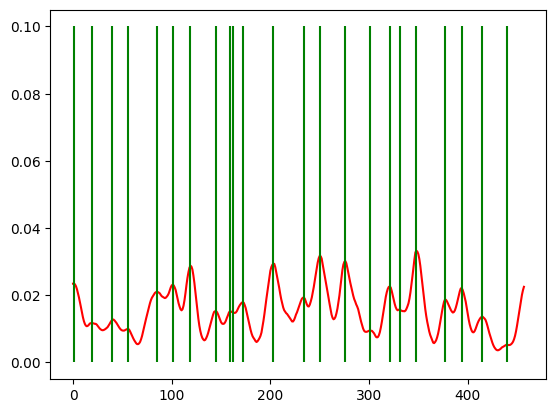

In [238]:
angles = np.array(list(similarity_dict.values()))
smooth_angles = signal.savgol_filter(x=angles, window_length=18, polyorder=3, mode='nearest')
smoother_angles = signal.savgol_filter(x=smooth_angles, window_length=18, polyorder=3, mode='nearest')
maxima_indices= signal.argrelmax(smoother_angles)
print(maxima_indices[0].shape)
# plt.plot(angles)
# plt.plot(smooth_angles, color='b')
plt.plot(smoother_angles, color='r')
plt.vlines(maxima_indices[0], ymin=0, ymax=0.10, colors='g')

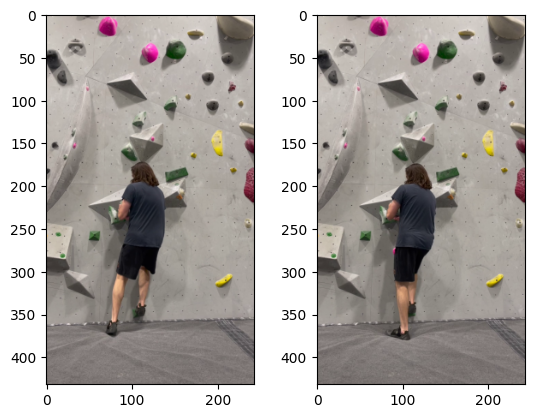

In [237]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(resized_frame_list[40][:, :, ::-1])
ax[1].imshow(resized_frame_list[56][:, :, ::-1])

In [239]:
minimas_indices

(array([  1,  19,  40,  56,  85, 101, 119, 145, 159, 162, 172, 203, 234,
        250, 276, 301, 321, 331, 348, 377, 394, 415, 440]),)